In [1]:
using DifferentialEquations
using Plots


In [2]:
begin
 G=4*pi*pi 
 m1=1 
 m2=3.014*(10^(-6))
 m3=c=3.212*(10^(-7))
#energia potencial:
 V(x1,y1,z1,x2,y2,z2,x3,y3,z3)=-G*m1*m2/sqrt( (x1-x2)^2 + (y1-y2)^2 +(z1-z2)^2 )-G*m1*m3/sqrt( (x3-x1)^2 + (y3-y1)^2 +(z1-z3)^2 )-G*m2*m3/ sqrt( (x3-x1)^2 + (y3-y1)^2 +(z1-z3)^2 )  
#energia mecanica total:
    
E(x1,y1,z1,x2,y2,z2,x3,y3,z3,dx1,dy1,dz1,dx2,dy2,dz2,dx3,dy3,dz3)=V(x1,y1,z1,x2,y2,z2,x3,y3,z3)+1//2*m1*(dx1^2+dy1^2+dz1^2)+1//2*m2*(dx2^2+dy2^2+dz2^2)+1//2*m3*(dx3^2+dy3^2+dz3^2) 

    tspan=(0.0,8.0)   
    
end

(0.0, 8.0)

In [3]:
function tres_cuerpos_3D!(dv,v,u,p,t)
    x1,y1,z1,x2,y2,z2,x3,y3,z3 = u
    dx1,dy1,dz1,dx2,dy2,dx3,dy3= dv
    
    #Posiciones relativas entre las masas
    r12 = sqrt( (x1-x2)^2 + (y1-y2)^2 +(z1-z2)^2 );
    r23 = sqrt( (x2-x3)^2 + (y2-y3)^2 +(z3-z2)^2 );
    r31 = sqrt( (x3-x1)^2 + (y3-y1)^2 +(z1-z3)^2 );
    
    #Aceleracion de la primera masa:
    
    dv[1]=G*(m2*((x2-x1)/r12^3)+(m3*(x3-x1)/r31^3))
    dv[2]=G*(m2*((y2-y1)/r12^3)+(m3*(y3-y1)/r31^3))
    dv[3]=G*(m2*((z2-z1)/r12^3)+(m3*(z3-z1)/r31^3))
    
    #Aceleracion de la segunda masa:
    dv[4]=G*(m1*((x1-x2)/r12^3)+(m3*(x3-x2)/r23^3))
    dv[5]=G*(m1*((y1-y2)/r12^3)+(m3*(y3-y2)/r23^3))
    dv[6]=G*(m1*((z1-z2)/r12^3)+(m3*(z3-z2)/r23^3))
    
    #Aceleraion de la tercera masa:
    
    dv[7]=G*(m1*((x1-x3)/r31^3)+(m2*(x2-x3)/r23^3))
    dv[8]=G*(m1*((y1-y3)/r31^3)+(m2*(y2-y3)/r23^3)) 
    dv[9]=G*(m1*((z1-z3)/r31^3)+(m2*(z2-z3)/r23^3))
    
end    

tres_cuerpos_3D! (generic function with 1 method)

In [4]:
begin
initial_positions =  [ 0.0 , 0.0 , 0.0 , -1.0 ,0.0 ,0.0, -1.52, 0.0,0.0]
initial_velocities = [ 0.0 , 1.0  ,0.0 ,  0.0 ,0.0 ,-2*pi, 0.0, 0.0,-5.075]
end

9-element Vector{Float64}:
  0.0
  1.0
  0.0
  0.0
  0.0
 -6.283185307179586
  0.0
  0.0
 -5.075

In [5]:
begin
prob = SecondOrderODEProblem(tres_cuerpos_3D!,initial_velocities,initial_positions,tspan)
    sol = solve(prob, KahanLi8(), abs_tol=1e-10,dt=0.01)
end

retcode: Success
Interpolation: 3rd order Hermite
t: 802-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.060000000000000005
 0.07
 0.08
 0.09
 0.09999999999999999
 0.10999999999999999
 0.11999999999999998
 ⋮
 7.899999999999876
 7.909999999999876
 7.919999999999876
 7.929999999999875
 7.939999999999875
 7.949999999999875
 7.959999999999875
 7.9699999999998745
 7.979999999999874
 7.989999999999874
 7.999999999999874
 8.0
u: 802-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([0.0, 1.0, 0.0, 0.0, 0.0, -6.283185307179586, 0.0, 0.0, -5.075], [0.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.52, 0.0, 0.0])
 ([-1.2439104437416995e-6, 0.9999999938724866, -3.828220358818231e-8, 0.39450429602602854, 0.0019731236652498767, -6.270787800130888, 0.1708421404708862, 0.0005620141815712416, -5.072147828943322], [-6.221685404145137e-9, 0.009999999979571723, -1.2762761809605587e-10, -0.9980267800621127, 6.578141714837487e-6, -0.06279052137030892, -1.5191457020194477, 1

In [9]:
plot( sol , vars=[(10,11,12),(13,14,15),(16,17,18)],xlabel="x",ylabel="y",zlabel="z", color=[ "yellow" "blue" "red"] ,lw = [3, 1, 1],label=["sol" "tierra" "marte"])

┌ Warning: Indices Base.OneTo(3) of attribute `linewidth` does not match data indices 1:8020.
└ @ Plots C:\Users\Angelo\.julia\packages\Plots\LSKOd\src\utils.jl:132
┌ Warning: Indices Base.OneTo(3) of attribute `linewidth` does not match data indices 1:8020.
└ @ Plots C:\Users\Angelo\.julia\packages\Plots\LSKOd\src\utils.jl:132


┌ Warning: Indices Base.OneTo(3) of attribute `linewidth` does not match data indices 1:8020.
└ @ Plots C:\Users\Angelo\.julia\packages\Plots\LSKOd\src\utils.jl:132


┌ Info: Saved animation to 
│   fn = C:\Users\Angelo\tmp.gif
└ @ Plots C:\Users\Angelo\.julia\packages\Plots\LSKOd\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Angelo\\tmp.gif")
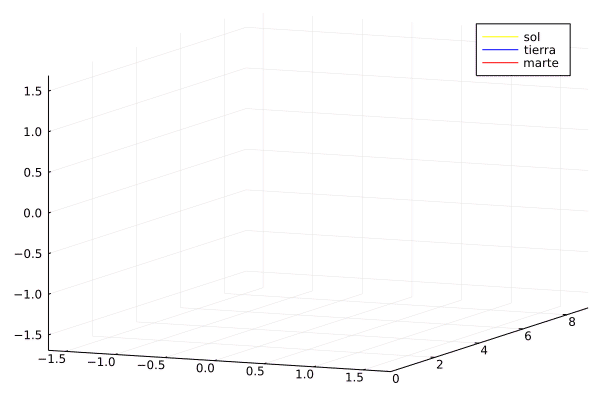

In [15]:
#animate(sol,lw=1,every=1,vars=[(10,11,12),(13,14,15),(16,17,18)],color=[ "yellow" "blue" "red"] ,label=["sol" "tierra" "marte"])

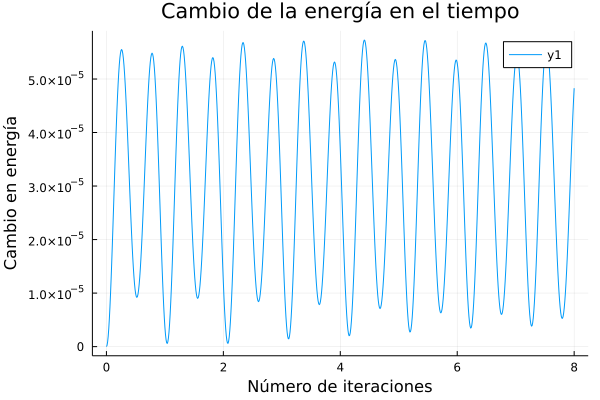

In [6]:
begin
energy= map(x->E(x[10], x[11], x[12], x[13],x[14], x[15], x[16], x[17],x[18],x[1], x[1], x[2], x[3],x[4], x[5], x[6], x[7],x[8]), sol.u)
plot(sol.t, energy .- energy[1], title = "Cambio de la energía en el tiempo", xaxis = "Número de iteraciones", yaxis = "Cambio en energía")
end